# Credit Score Prediction Model 
----

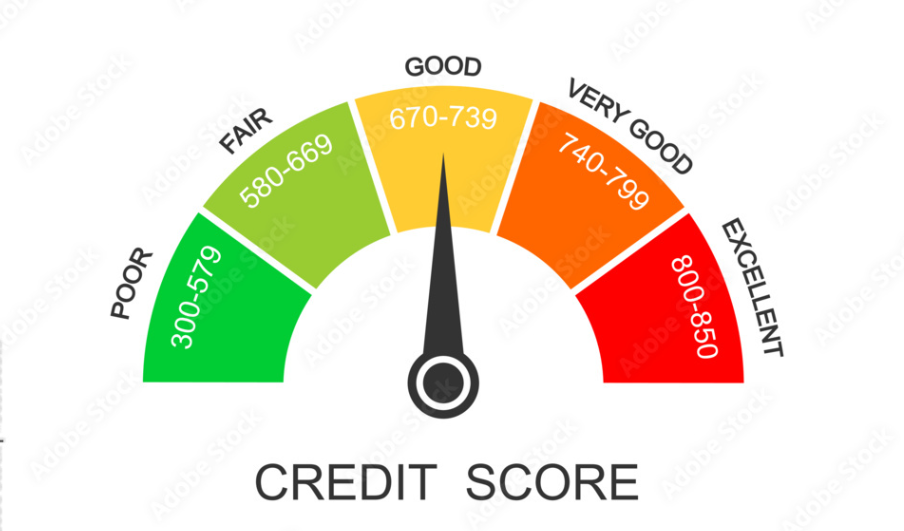

## 1. Introduction
--- 
Credit scores are essential in today's financial environment for determining a person's creditworthiness. Credit ratings are important because they help lenders—from internet lenders to traditional banks—make well-informed judgments about granting credit. Accurate and effective credit score classification is becoming more and more important as loan demand rises. In order to anticipate and categorize credit ratings, machine learning algorithms provide a potent toolkit for processing large amounts of financial data.

## 2. Data Description
---
In order to develop a solid and trustworthy credit scoring system, the project will examine feature engineering, model selection, and performance evaluation. The ultimate objective is to improve credit risk assessment techniques and give financial institutions more accurate instruments to analyze potential borrowers. By investigating the application of machine learning to credit scoring, we hope to further advance fair and efficient lending procedures and further the financial industry's continuous development. 

`About Dataset `
Dataset Size

- train.csv - 100000 rows
- test.csv - 50000 rows

Columns

- ID: Unique identifier for each record in the dataset.

- Customer_ID: Unique identifier for each customer.

- Month: The month for which the financial data is recorded.

- Name: Name of the individual.

- Age: Age of the individual.

- SSN: Social Security Number, a unique identifier for individuals in the U.S.

- Occupation: The occupation or profession of the individual.

- Annual_Income: Annual income of the individual.

- Monthly_Inhand_Salary: Net monthly salary after deductions.

- Num_Bank_Accounts: Number of bank accounts held by the individual.

- Num_Credit_Card: Number of credit cards owned by the individual.

- Interest_Rate: Interest rate associated with financial transactions.

- Num_of_Loan: Number of loans the individual has.

- Type_of_Loan: The type of loan(s) the individual has.

- Delay_from_due_date: Delay in payments from the due date.

- Num_of_Delayed_Payment: Number of delayed payments.

- Changed_Credit_Limit: Whether there has been a change in credit limit.

- Num_Credit_Inquiries: Number of credit inquiries made.

- Credit_Mix: The mix of different types of credit.

- Outstanding_Debt: Amount of outstanding debt.

- Credit_Utilization_Ratio: Ratio of credit used to the total credit available.

- Credit_History_Age: Age of credit history.

- Payment_of_Min_Amount: Payment behavior regarding the minimum amount due.

- Total_EMI_per_month: Total Equated Monthly Installment (EMI) payments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix
     

In [2]:
df = pd.read_csv("train.csv",low_memory=False)

In [3]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.43017233,!@9#%8,340.4792118,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674,Low_spent_Small_value_payments,244.5653167,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.78521651,High_spent_Medium_value_payments,358.1241676,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.6906269,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123783,High_spent_Large_value_payments,484.5912143,Good


In [4]:
df.shape

(100000, 28)

In [5]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [9]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [10]:

# Drop unnecessary columns
df.drop(["ID","Customer_ID","Name","SSN","Type_of_Loan"],axis=1,inplace=True)

In [11]:
# There are still features that comprise of missing values. The categorical features must be converted to numerical in order to fill missing data

## Finding the numerical and categorical columns
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
num_cols = [feature for feature in df.columns if feature not in cat_cols]
     

In [12]:
## Finding the unique values in each of the categorical feature columns
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}")
    print('\n')
     

Month:
Number of unique values in the Month: 8
Unique values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Age:
Number of unique values in the Age: 1788
Unique values: ['23' '-500' '28_' ... '4808_' '2263' '1342']


Occupation:
Number of unique values in the Occupation: 16
Unique values: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


Annual_Income:
Number of unique values in the Annual_Income: 18940
Unique values: ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']


Num_of_Loan:
Number of unique values in the Num_of_Loan: 434
Unique values: ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1

# Data Encoding (Categorical --> Numerical Data)

In [13]:
df["Month"].value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

C:\Users\YASHRAJ MISHRA\AppData\Local\Temp\ipykernel_11808\3669161035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Month",data=df,palette="Dark2")


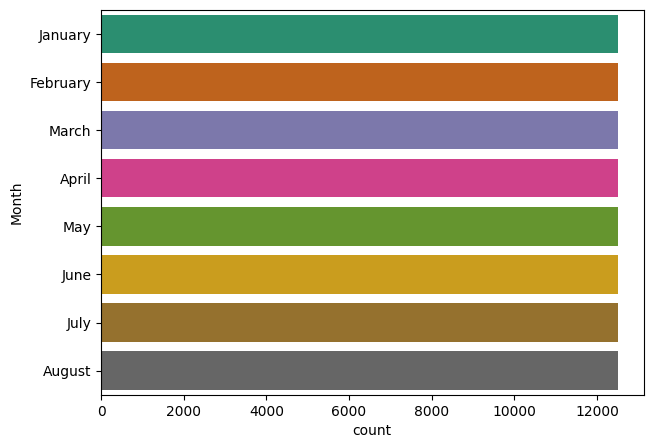

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(y="Month",data=df,palette="Dark2")
plt.show()
     

In [15]:
month_mapping = {
   'January': 1,
    'February': 2,
    'March': 3,
    "April":4,
    "May":5,
    "June":6,
    "July":7,
    "August":8}
df['Month'] = df['Month'].replace(month_mapping)
     


In [16]:
df["Occupation"].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

C:\Users\YASHRAJ MISHRA\AppData\Local\Temp\ipykernel_11808\581240180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Occupation",data=df,palette="Set1")


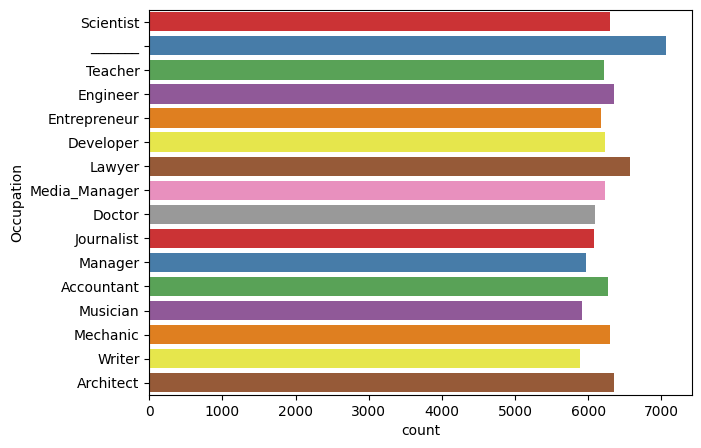

In [17]:

plt.figure(figsize=(7,5))
sns.countplot(y="Occupation",data=df,palette="Set1")
plt.show()

In [18]:
occupation_mapping = {
    'Lawyer': 1,
    'Architect': 2,
    'Engineer': 3,
    'Scientist': 4,
    'Mechanic': 5,
    'Accountant': 6,
    'Developer': 7,
    'Media_Manager': 8,
    'Teacher': 9,
    'Entrepreneur': 10,
    'Doctor': 11,
    'Journalist': 12,
    'Manager': 13,
    'Musician': 14,
    'Writer': 15
}

df['Occupation'] = df['Occupation'].replace(occupation_mapping)

     

In [19]:

df["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

C:\Users\YASHRAJ MISHRA\AppData\Local\Temp\ipykernel_11808\1614930895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Credit_Mix",data=df,palette="inferno")


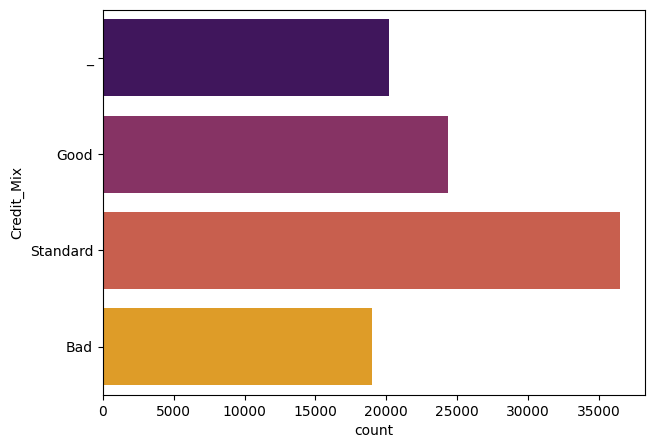

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(y="Credit_Mix",data=df,palette="inferno")
plt.show()

In [21]:
credit_map={"Good":1,"Standard":2,"Bad":3}
df['Credit_Mix'] = df['Credit_Mix'].replace(credit_map)
     

In [22]:
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

C:\Users\YASHRAJ MISHRA\AppData\Local\Temp\ipykernel_11808\3477062191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment_Behaviour",data=df,palette="inferno")


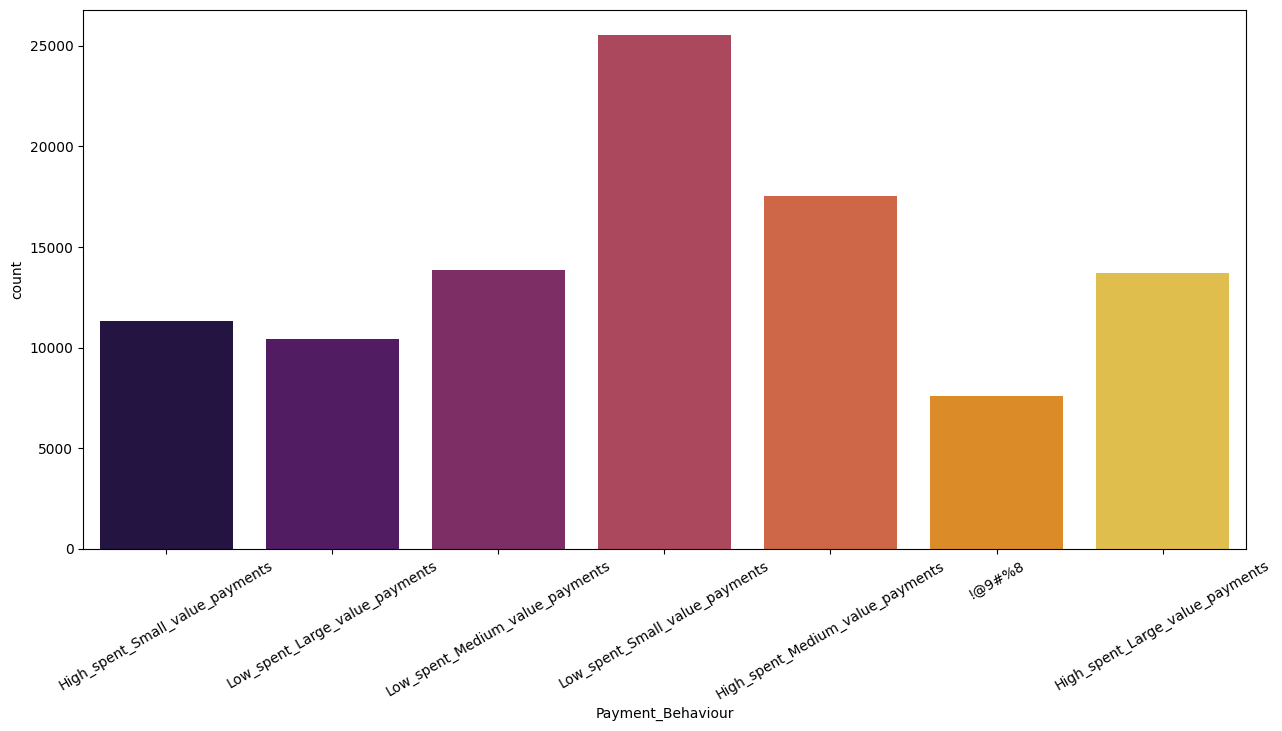

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(x="Payment_Behaviour",data=df,palette="inferno")
plt.xticks(rotation=30)
plt.show()

In [24]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)
     

In [25]:
category_mapping = {
    'Low_spent_Small_value_payments':1,
    'High_spent_Medium_value_payments':2,
    'Low_spent_Medium_value_payments': 3,
    'High_spent_Large_value_payments': 4,
    'High_spent_Small_value_payments': 5,
    'Low_spent_Large_value_payments': 6
}
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(category_mapping)
     

In [26]:
df["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

C:\Users\YASHRAJ MISHRA\AppData\Local\Temp\ipykernel_11808\2948456695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment_of_Min_Amount",data=df,palette="spring")


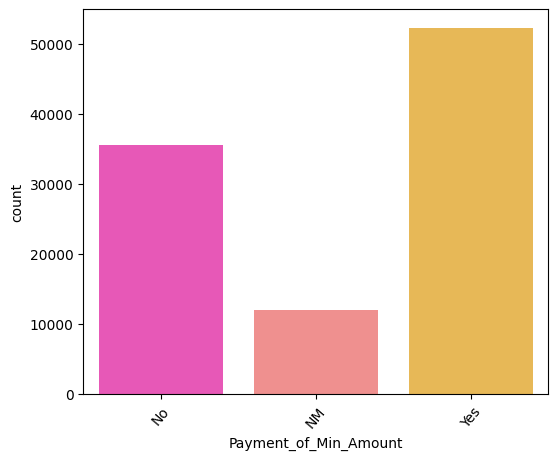

In [27]:
plt.figure(figsize=(6,5))
sns.countplot(x="Payment_of_Min_Amount",data=df,palette="spring")
plt.xticks(rotation=50)
plt.show()

In [28]:
pay_map={"Yes":1,"No":2,"NM":3}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(pay_map)
     

In [29]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

C:\Users\YASHRAJ MISHRA\AppData\Local\Temp\ipykernel_11808\2211267967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_Score",data=df,palette="hot")


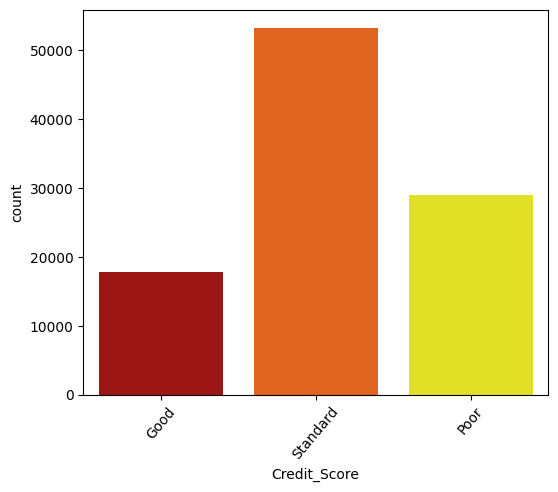

In [30]:
plt.figure(figsize=(6,5))
sns.countplot(x="Credit_Score",data=df,palette="hot")
plt.xticks(rotation=50)
plt.show()


C:\Users\YASHRAJ MISHRA\AppData\Local\Temp\ipykernel_11808\118268149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_Score",data=df,palette="hot")


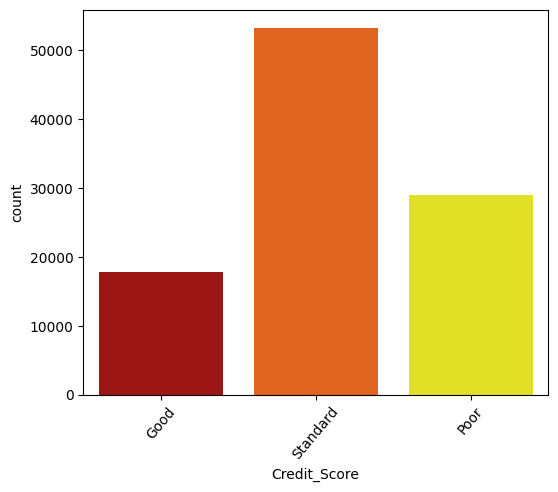

In [31]:
plt.figure(figsize=(6,5))
sns.countplot(x="Credit_Score",data=df,palette="hot")
plt.xticks(rotation=50)
plt.show()

- this was the data visualization part through this we understand graphical frequency analysis of dataset.

# Handling Missing Values
----

In [32]:
# Monthly Inhand Salary
mean_salary = df["Monthly_Inhand_Salary"].mean()
df["Monthly_Inhand_Salary"].fillna(mean_salary, inplace=True)

In [33]:
# Number of Delayed Payment
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"], errors="coerce")
n_mean=df["Num_of_Delayed_Payment"].mean()
df["Num_of_Delayed_Payment"].fillna(n_mean, inplace=True)

In [34]:
# Number of Credit Inquiries 
in_mean=df["Num_Credit_Inquiries"].mean()
df["Num_Credit_Inquiries"].fillna(in_mean, inplace=True) 

In [35]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract(r'(\d+)')

In [36]:
df["Credit_History_Age"] = pd.to_numeric(df["Credit_History_Age"], errors="coerce")
credit_mean=df["Credit_History_Age"].mean()
df["Credit_History_Age"].fillna(credit_mean, inplace=True)
     

In [37]:
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"], errors="coerce")
invest_mean=df["Amount_invested_monthly"].mean()
df["Amount_invested_monthly"].fillna(invest_mean, inplace=True)

In [38]:
df.dropna(subset=["Payment_Behaviour"], inplace=True)
     

In [39]:
# Finally, dealing with Monthly Balance 

df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors="coerce")
month_mean=df["Monthly_Balance"].mean()
df["Monthly_Balance"].fillna(month_mean, inplace=True)

In [42]:
# Here we had a cleaned dataset
df.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

## Typecasting / Formatting

In [44]:
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"], errors="coerce")
an_mean=df["Annual_Income"].mean()
df["Annual_Income"].fillna(an_mean, inplace=True)

In [45]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [46]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)  # Replace '_' with 0
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors="coerce")
c_mean=df["Changed_Credit_Limit"].mean()
df["Changed_Credit_Limit"].fillna(c_mean, inplace=True)

In [48]:
df['Age'] = df['Age'].replace('-500',np.nan)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
age_mean=df["Age"].mean()
df["Age"].fillna(age_mean, inplace=True)

In [49]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors="coerce")
num_mean=df["Num_of_Loan"].mean()
df["Num_of_Loan"].fillna(num_mean, inplace=True)

In [50]:
df['Delay_from_due_date'] = df['Delay_from_due_date']

# Data Visualization
---

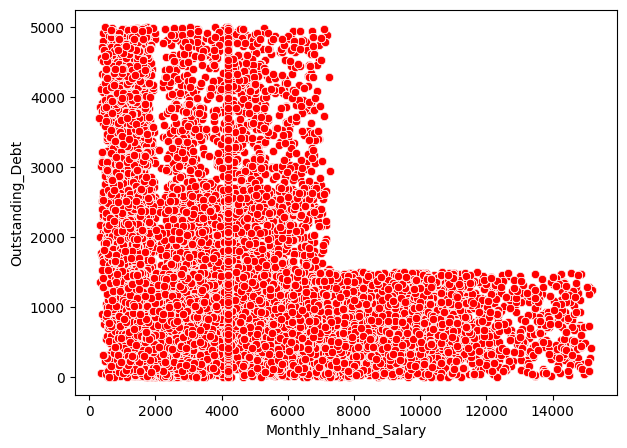

In [56]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Monthly_Inhand_Salary", y="Outstanding_Debt",color="red")
plt.show()

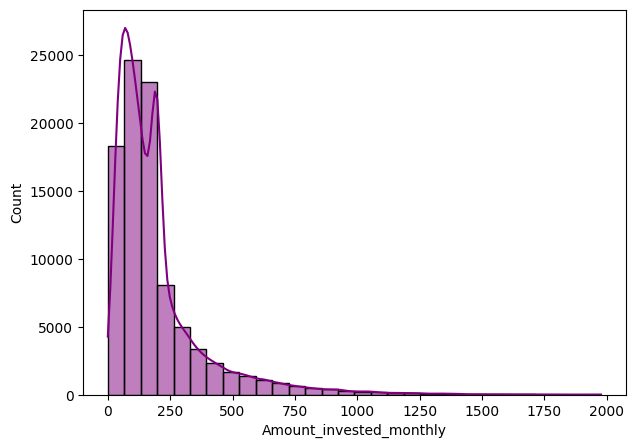

In [57]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Amount_invested_monthly", kde=True,bins=30,color="purple")
plt.show()

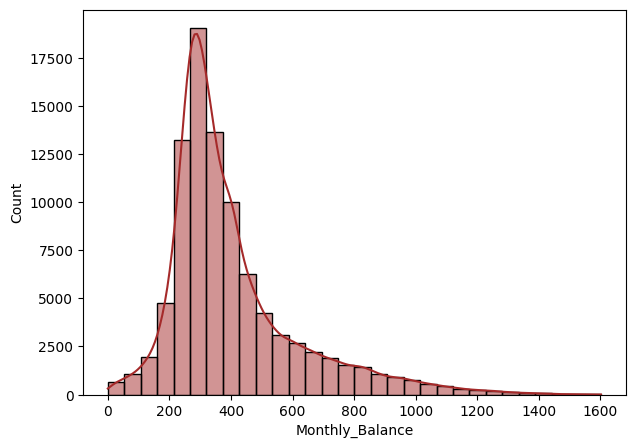

In [58]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Monthly_Balance", kde=True,bins=30,color="brown")
plt.show()

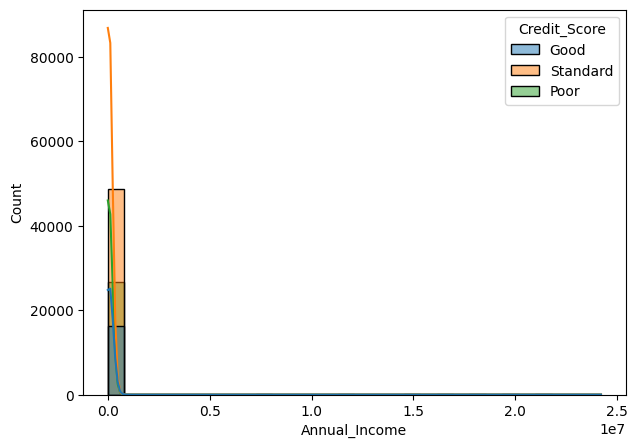

In [59]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Annual_Income", kde=True,bins=30,hue="Credit_Score")
plt.show()

# Data Scaling

In [64]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [65]:
df['Credit_Score'].replace({'Good': 0, 'Poor': 1, 'Standard': 2}, inplace=True)

In [66]:
columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                    'Amount_invested_monthly', 'Monthly_Balance']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

     

x=df.drop("Credit_Score",axis=1)
y=df["Credit_Score"]
     

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
     

# Model Training
---
We will be training the dataset on 2 different models:

1. Extreme Gradient Boosting Classifier
2. Light Gradient Boosting Machine

# Extreme Gradient Classifier

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [86]:
df['Occupation'] = pd.to_numeric(df['Occupation'], errors='coerce')

In [87]:
df ['Credit_Mix'] = pd.to_numeric(df['Credit_Mix'], errors='coerce')

In [88]:
xgb_model = XGBClassifier(eta=0.1, nrounds=1000, max_depth=8, colsample_bytree=0.5, scale_pos_weight=1.1, booster='gbtree', 
                                  metric='multi:softmax')
hr_pred = xgb_model.fit(xtrain._get_numeric_data(), np.ravel(ytrain, order='C')).predict(xtest._get_numeric_data())
print(classification_report(ytest, hr_pred))


[22:51:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "metric", "nrounds", "scale_pos_weight" } are not used.

              precision    recall  f1-score   support

           0       0.65      0.59      0.62      3304
           1       0.78      0.71      0.74      5372
           2       0.74      0.80      0.77      9804

    accuracy                           0.74     18480
   macro avg       0.72      0.70      0.71     18480
weighted avg       0.74      0.74      0.74     18480



In [93]:
x_loss=xgb_model.predict_proba(xtest._get_numeric_data())
logloss = log_loss(ytest,x_loss)
print("Log Loss:", logloss)

Log Loss: 0.5984187967130136


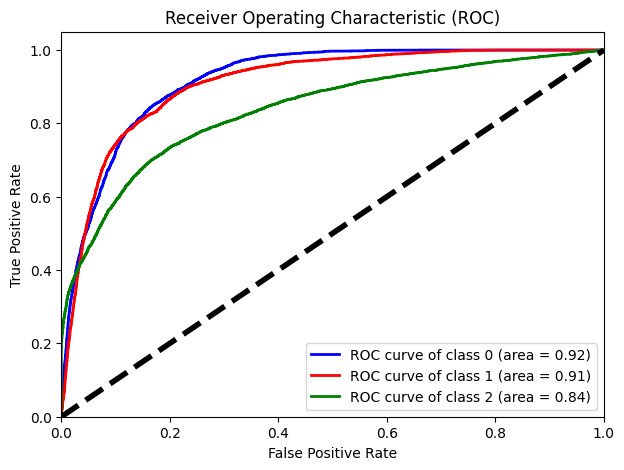

In [94]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest,x_loss[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(7,5))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# LightGBM (Light Gradient Boosting Machine)

In [97]:
lgb_classifier = LGBMClassifier(boosting_type='gbdt', num_leaves=31,max_depth=-1,learning_rate=0.1,
                                n_estimators=100,

                                random_state=42,
                                objective='multiclass',  # Multi-class objective
                                metric='multi_logloss')
     

#lgb_classifier.fit(xtrain, ytrain, eval_set=[(xtest._get_numeric_data(), ytest._get_numeric_data())])
hr_pred_ = lgb_classifier.fit(xtrain._get_numeric_data(), np.ravel(ytrain, order='C')).predict(xtest._get_numeric_data())
print(classification_report(ytest, hr_pred_))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3929
[LightGBM] [Info] Number of data points in the train set: 73920, number of used features: 20
[LightGBM] [Info] Start training from score -1.727246
[LightGBM] [Info] Start training from score -1.239546
[LightGBM] [Info] Start training from score -0.629776
              precision    recall  f1-score   support

           0       0.64      0.59      0.61      3304
           1       0.76      0.67      0.71      5372
           2       0.73      0.79      0.76      9804

    accuracy                           0.72     18480
   macro avg       0.71      0.68      0.70     18480
weighted avg       0.72      0.72      0.72     18480



In [98]:
lgb=lgb_classifier.predict_proba(xtest._get_numeric_data())
logloss2 = log_loss(ytest,lgb)
print("Log Loss:", logloss2)

Log Loss: 0.6201827316603833


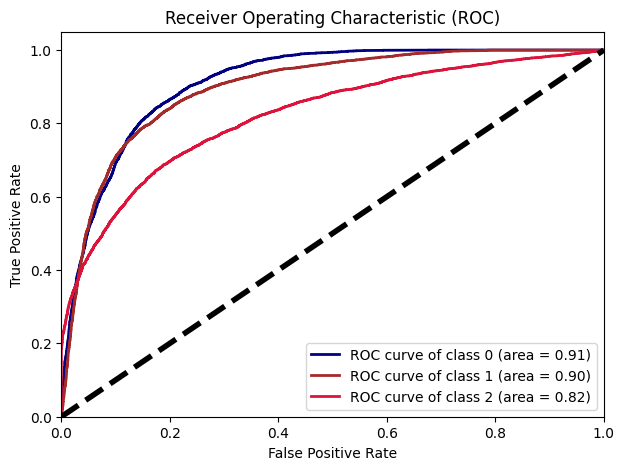

In [99]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest,lgb[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(7,5))
colors = ['navy', 'brown', 'crimson']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [102]:
pred=xgb_model.predict(xtest._get_numeric_data())
xgb_ac=accuracy_score(ytest,pred)
print("XGB Accuracy Score :",xgb_ac)

XGB Accuracy Score : 0.7372294372294372


In [103]:
pred0=lgb_classifier.predict(xtest._get_numeric_data())
acc0=accuracy_score(ytest,pred0)
print("accuracy score :",acc0)

accuracy score : 0.7216991341991342


C:\Users\YASHRAJ MISHRA\AppData\Local\Temp\ipykernel_11808\1811797123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Model', x='Accuracy', data=results_df, palette='viridis')


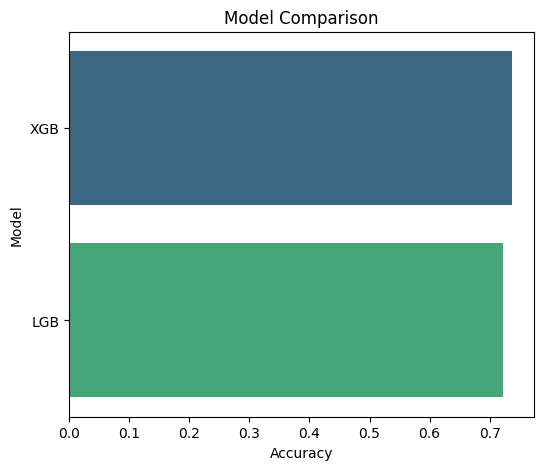

In [104]:
results = {'XGB': xgb_ac,'LGB': acc0}
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
plt.figure(figsize=(6,5))
sns.barplot(y='Model', x='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison')
plt.show()

C:\Users\YASHRAJ MISHRA\AppData\Local\Temp\ipykernel_11808\66943108.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Model', x='Log Loss', data=log_loss_df, palette='viridis')


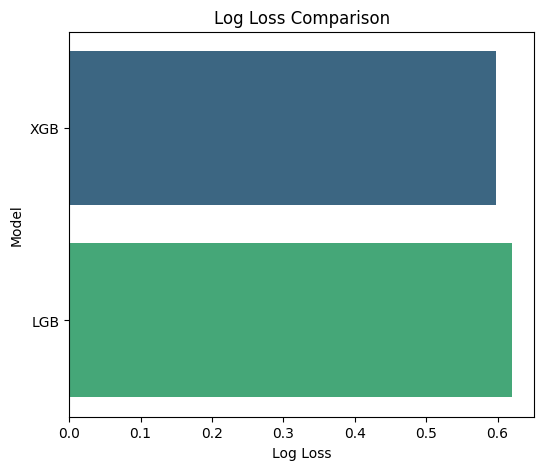

In [105]:
# Loss accuracy

log_loss_results = {'XGB': logloss, 'LGB': logloss2}
log_loss_df = pd.DataFrame(list(log_loss_results.items()), columns=['Model', 'Log Loss'])
plt.figure(figsize=(6,5))
sns.barplot(y='Model', x='Log Loss', data=log_loss_df, palette='viridis')
plt.title('Log Loss Comparison')
plt.show()

# LGBM Classifier found out to be best suitable for the model Therefore, Saving Model

In [107]:
from lightgbm import LGBMClassifier
import joblib

# Assuming you have your trained LGBMClassifier in the lgb_classifier variable
lgb_classifier = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    objective='multiclass',  # Multi-class objective
    metric='multi_logloss'
)

# Train the model (replace with your actual training data)
lgb_classifier.fit(xtrain._get_numeric_data(), np.ravel(ytrain, order='C')).predict(xtest._get_numeric_data())

# Save the LGBMClassifier as a pkl file
model_filename = "lgb_model.pkl"
joblib.dump(lgb_classifier, model_filename)

print(f"LGBMClassifier model saved as {model_filename}")
     

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3929
[LightGBM] [Info] Number of data points in the train set: 73920, number of used features: 20
[LightGBM] [Info] Start training from score -1.727246
[LightGBM] [Info] Start training from score -1.239546
[LightGBM] [Info] Start training from score -0.629776
LGBMClassifier model saved as lgb_model.pkl


# Testing Model 

In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the test data
df_test = pd.read_csv("testing.csv")

# Preprocess the test data
# Drop unnecessary columns
df_test.drop(["ID","Customer_ID","Name","SSN","Type_of_Loan"],axis=1,inplace=True)

# Encode categorical features
month_mapping = {
   'January': 1,
    'February': 2,
    'March': 3,
    "April":4,
    "May":5,
    "June":6,
    "July":7,
    "August":8,
    "September":9,
    "October":10,
    "November":11,
    "December":12}
df_test['Month'] = df_test['Month'].replace(month_mapping)
#df_test['Month'] = df_test['Month'].astype('int')


df_test.drop(df_test[df_test["Occupation"]=='_______'].index,inplace=True)
df_test.drop(df_test[df_test["Credit_Mix"]=='_'].index,inplace=True)


#df_test['Occupation'] = df_test['Occupation'].astype('int')
occupation_mapping = {
    'Lawyer': 1,
    'Architect': 2,
    'Engineer': 3,
    'Scientist': 4,
    'Mechanic': 5,
    'Accountant': 6,
    'Developer': 7,
    'Media_Manager': 8,
    'Teacher': 9,
    'Entrepreneur': 10,
    'Doctor': 11,
    'Journalist': 12,
    'Manager': 13,
    'Musician': 14,
    'Writer': 15,
    'Scientist': 16
}
df_test['Occupation'] = df_test['Occupation'].replace(occupation_mapping)

#df_test['Credit_Mix'] = df_test['Credit_Mix'].astype('int')
credit_map={"Good":1,"Standard":2,"Bad":3}
df_test['Credit_Mix'] = df_test['Credit_Mix'].replace(credit_map)

df_test['Payment_Behaviour']= df_test['Payment_Behaviour'].replace("!@9#%8",np.nan)
category_mapping = {
    'Low_spent_Small_value_payments':1,
    'High_spent_Medium_value_payments':2,
    'Low_spent_Medium_value_payments': 3,
    'High_spent_Large_value_payments': 4,
    'High_spent_Small_value_payments': 5,
    'Low_spent_Large_value_payments': 6
}
df_test['Payment_Behaviour'] = df_test['Payment_Behaviour'].replace(category_mapping)

pay_map={"Yes":1,"No":2,"NM":3}
df_test['Payment_of_Min_Amount'] = df_test['Payment_of_Min_Amount'].replace(pay_map)



# Handle missing values
mean_salary = df_test["Monthly_Inhand_Salary"].mean()
df_test["Monthly_Inhand_Salary"].fillna(mean_salary, inplace=True)
df_test["Num_of_Delayed_Payment"] = pd.to_numeric(df_test["Num_of_Delayed_Payment"], errors="coerce")
n_mean=df_test["Num_of_Delayed_Payment"].mean()
df_test["Num_of_Delayed_Payment"].fillna(n_mean, inplace=True)
in_mean=df_test["Num_Credit_Inquiries"].mean()
df_test["Num_Credit_Inquiries"].fillna(in_mean, inplace=True)
df_test['Credit_History_Age'] = df_test['Credit_History_Age'].str.extract(r'(\d+)')
df_test["Credit_History_Age"] = pd.to_numeric(df_test["Credit_History_Age"], errors="coerce")
credit_mean=df_test["Credit_History_Age"].mean()
df_test["Credit_History_Age"].fillna(credit_mean, inplace=True)
df_test["Amount_invested_monthly"] = pd.to_numeric(df_test["Amount_invested_monthly"], errors="coerce")
invest_mean=df_test["Amount_invested_monthly"].mean()
df_test["Amount_invested_monthly"].fillna(invest_mean, inplace=True)
df_test.dropna(subset=["Payment_Behaviour"], inplace=True)
df_test["Monthly_Balance"] = pd.to_numeric(df_test["Monthly_Balance"], errors="coerce")
month_mean=df_test["Monthly_Balance"].mean()
df_test["Monthly_Balance"].fillna(month_mean, inplace=True)


df_test["Annual_Income"] = pd.to_numeric(df_test["Annual_Income"], errors="coerce")
an_mean=df_test["Annual_Income"].mean()
df_test["Annual_Income"].fillna(an_mean, inplace=True)
df_test['Outstanding_Debt'] = pd.to_numeric(df_test['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
df_test['Changed_Credit_Limit'] = df_test['Changed_Credit_Limit'].replace('_',np.nan)  # Replace '_' with 0
df_test["Changed_Credit_Limit"] = pd.to_numeric(df_test["Changed_Credit_Limit"], errors="coerce")
c_mean=df_test["Changed_Credit_Limit"].mean()
df_test["Changed_Credit_Limit"].fillna(c_mean, inplace=True)
df_test['Age'] = df_test['Age'].replace('-500',np.nan)
df_test["Age"] = pd.to_numeric(df_test["Age"], errors="coerce")
age_mean=df_test["Age"].mean()
df_test["Age"].fillna(age_mean, inplace=True)
df_test["Num_of_Loan"] = pd.to_numeric(df_test["Num_of_Loan"], errors="coerce")
num_mean=df_test["Num_of_Loan"].mean()
df_test["Num_of_Loan"].fillna(num_mean, inplace=True)
df_test['Delay_from_due_date'] = df_test['Delay_from_due_date'].abs()


# Scale numerical features
columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt',
                   'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                   'Amount_invested_monthly', 'Monthly_Balance']
scaler = StandardScaler()
df_test[columns_to_scale] = scaler.fit_transform(df_test[columns_to_scale])

# Separate features and target
X_test = df_test.copy()

     

In [114]:
# Load the saved model from the specified path
model_path = 'lgb_model.pkl'
lgb_classifier = joblib.load(model_path)
     

# Make predictions on the test set
predicted_credit_scores = lgb_classifier.predict(xtest._get_numeric_data())

In [115]:
# Print the first 100 predicted credit scores in the form of an array
print("Predicted Credit Scores:")
print("[", end="")

for i in range(min(100, len(predicted_credit_scores))):
    if i > 0:
        print(", ", end="")
    print(predicted_credit_scores[i], end="")

    # Add line break after every 10 scores
    if (i + 1) % 10 == 0:
        print("\n", end="")

Predicted Credit Scores:
[1, 2, 1, 2, 2, 1, 0, 2, 0, 2
, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2
, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2
, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2
, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2
, 1, 0, 2, 1, 0, 1, 1, 2, 0, 2
, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2
, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2
, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1
, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2
